In [1]:
# This makes the jupyter notebook wider
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pytz
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
series = 'Margalefidinium_perL'
bins = pd.read_csv(f'{series}.csv', index_col='pid', parse_dates=['sample_time'])
bins.head()

,sample_time,bin_ml,Margalefidinium_perL
pid,,,
D20200814T201734_IFCB149,2020-08-14 20:17:34+00:00,1.100,0.000000
D20200814T204118_IFCB149,2020-08-14 20:41:18+00:00,0.978,0.000000
D20200814T210502_IFCB149,2020-08-14 21:05:02+00:00,1.415,706.713781
D20200814T212847_IFCB149,2020-08-14 21:28:47+00:00,0.992,2016.129032
D20200814T215231_IFCB149,2020-08-14 21:52:31+00:00,1.470,0.000000


In [4]:
def rust_demo(bins, threshold, pump_timer):
    
    # Calculating pump-off cycles
    pump_off = None
    pump_off_times = []
    for idx,row in bins.iterrows():
        
        # if value above threshold, note start time
        if row[series] >= threshold:
            if pump_off is None:
                pump_off = row['sample_time']

        # if perL below threshold and pump timer has elapsed, note time to turn pump on again
        elif pump_off and row['sample_time']-pump_off > dt.timedelta(hours=pump_timer):
            pump_off_times.append((pump_off,row['sample_time']))
            pump_off = None

    # create plot object
    fig, ax = plt.subplots(figsize=(10,4))
    
    # plot a vertical span for each pump off-on cycle
    for pump_off_time, pump_on_time in pump_off_times:
        ax.axvspan(xmin=pump_off_time, xmax=pump_on_time, alpha=0.25, color='orange')
    
    # plot cells per liter timeseries
    ax.plot(bins['sample_time'],bins[series])
    
    # plot horizontal threshold line
    ax.hlines(y=threshold,xmin=bins.sample_time[0],xmax=bins.sample_time[-1], color='black', linewidth=1)
    
    # annotations
    plt.ylabel("Cells per Liter")
    plt.title(f'{series} 2020')
    plt.xticks(rotation=90)
    
    plt.show()

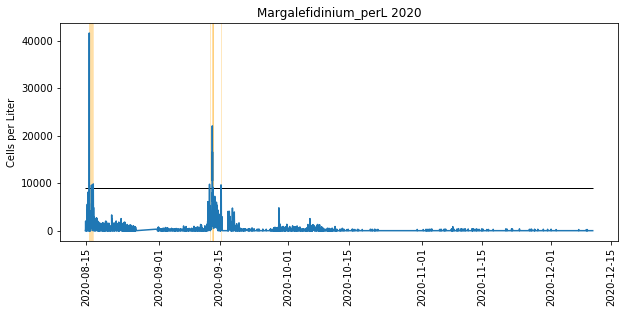

In [5]:
start = dt.datetime(2020, 8, 1, tzinfo=pytz.UTC)
end   = dt.datetime(2020,12,30, tzinfo=pytz.UTC)
mask  = (bins['sample_time'] > start) & (bins['sample_time'] <= end)

masked_bins = bins[mask]

TRESHOLD = 9000   # counts per liter
PUMP_TIMER = 1.5  # hours

rust_demo(masked_bins, TRESHOLD, PUMP_TIMER)